## 데이터 분석 및 전처리

### *학습 데이터셋의 변수*
* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

## Import Library

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as spst

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [47]:
# plt.rc('font', family='nanum')
# sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='whitegrid')        

## Load Data

In [48]:
df = pd.read_csv('train_dataset.csv', delimiter=',')

# Data Analysis

## 단변량 분석

In [49]:
numerical = ['url_len', 'url_num_hyphens_dom', 'url_path_len',
       'url_domain_len', 'url_hostname_len', 'url_num_dots',
       'url_num_underscores', 'url_query_len', 'url_num_query_para', 'url_entropy',
       "html_num_tags('iframe')", "html_num_tags('script')",
       "html_num_tags('embed')", "html_num_tags('object')",
       "html_num_tags('div')", "html_num_tags('head')",
       "html_num_tags('body')", "html_num_tags('form')", "html_num_tags('a')"]

categorical = ['url_port', 'url_ip_present']

In [17]:
def plots(feature):
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    sns.distplot(df[feature])
    plt.subplot(1,3,2)
    sns.boxplot(df[feature])
    plt.subplot(1,3,3)
    sns.countplot(data = df, x = df[feature], hue = 'Result_v1')
    plt.show()

url_len


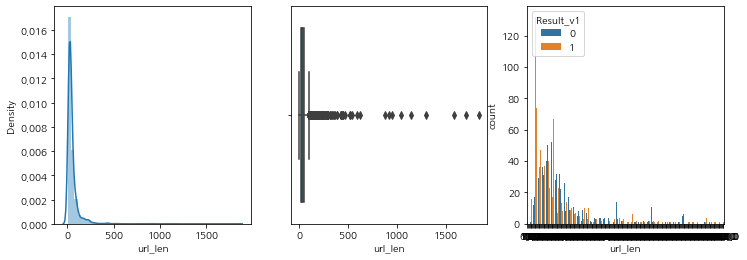

url_num_hyphens_dom


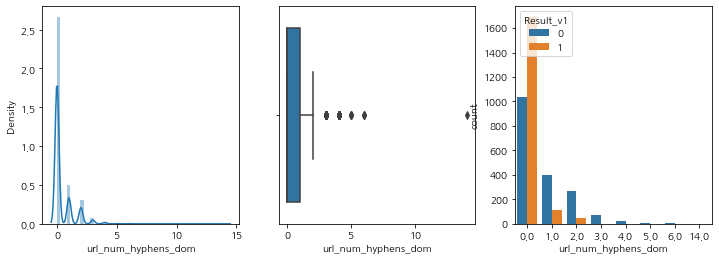

url_path_len


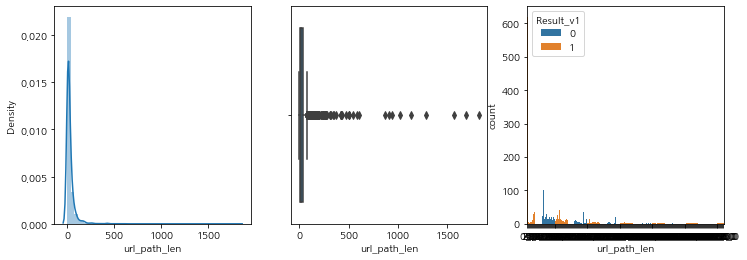

url_domain_len


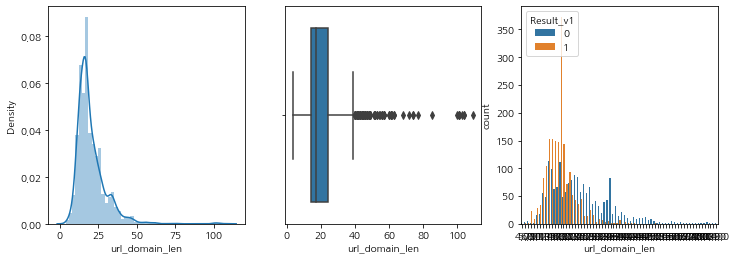

url_hostname_len


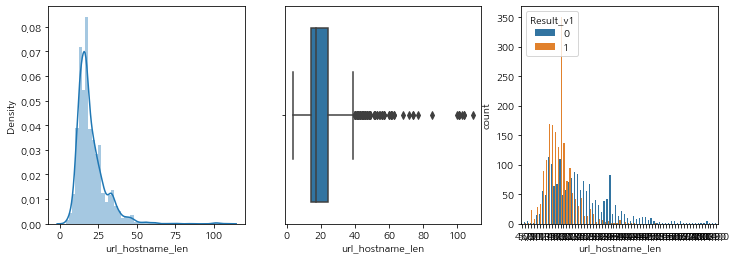

url_num_dots


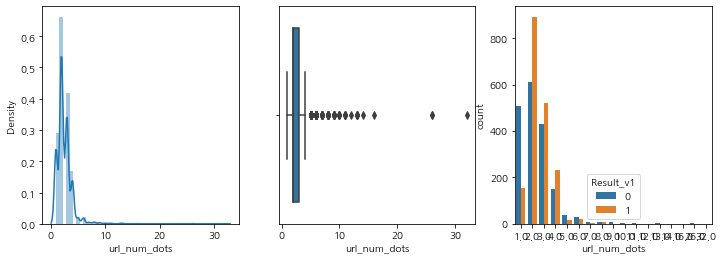

url_num_underscores


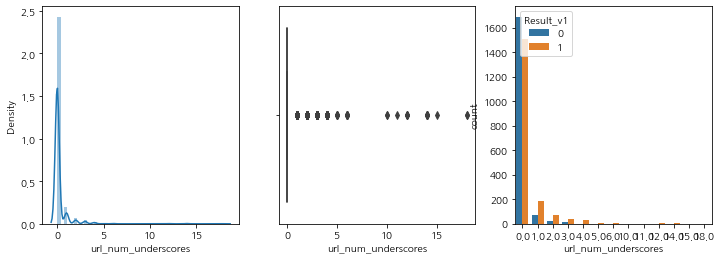

url_query_len


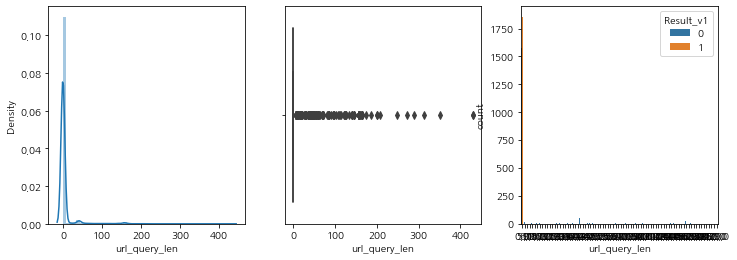

url_num_query_para


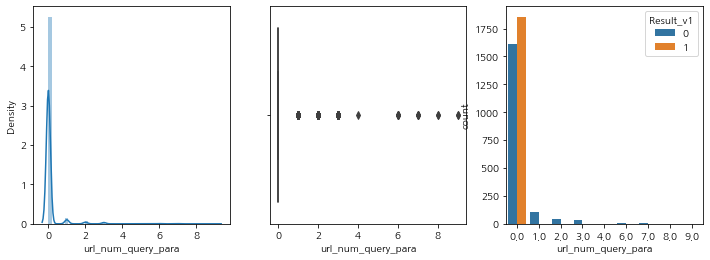

url_entropy


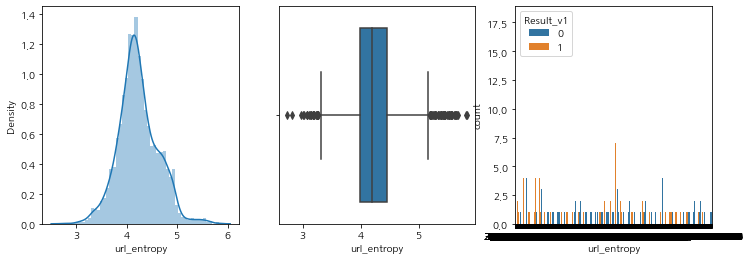

html_num_tags('iframe')


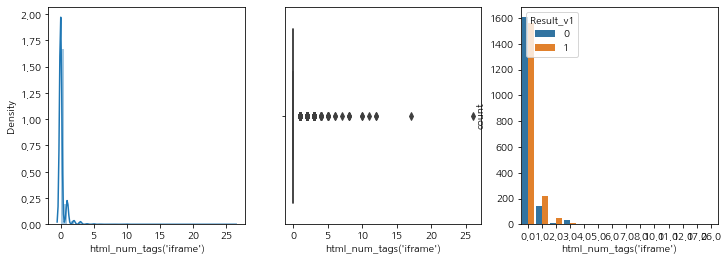

html_num_tags('script')


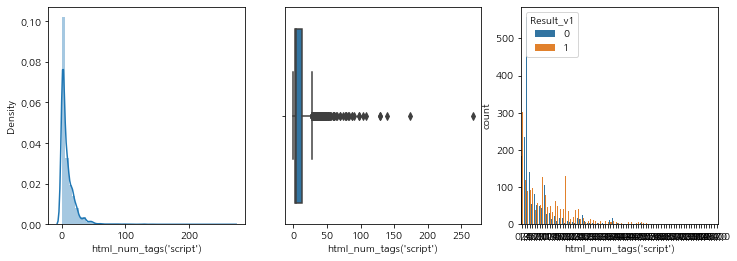

html_num_tags('embed')


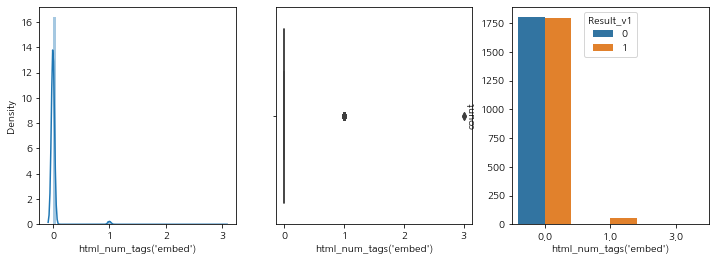

html_num_tags('object')


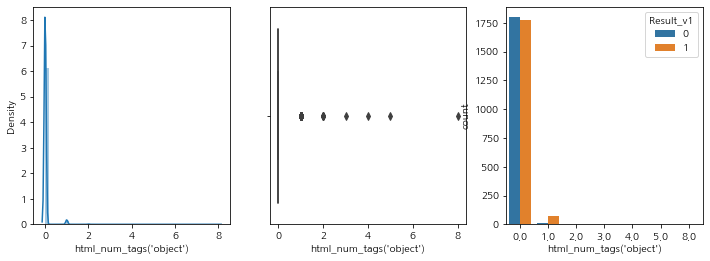

html_num_tags('div')


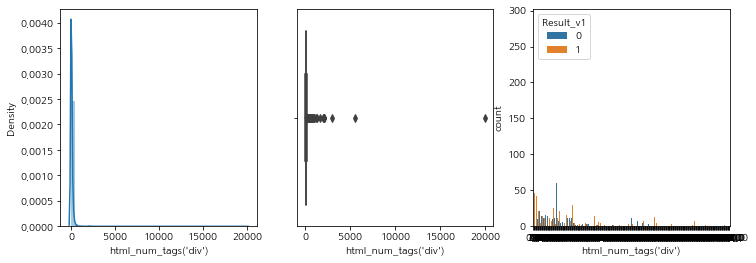

html_num_tags('head')


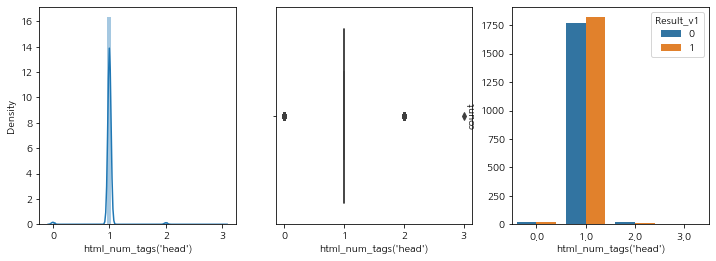

html_num_tags('body')


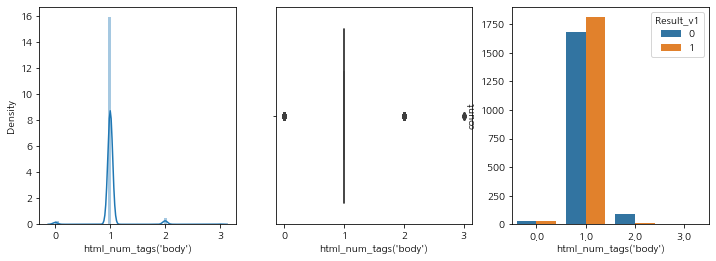

html_num_tags('form')


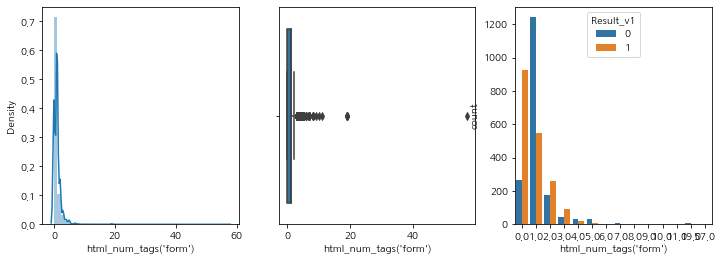

html_num_tags('a')


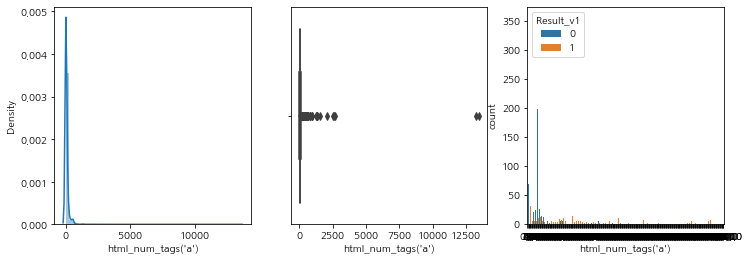

In [18]:
for i in numerical:
    print(i)
    plots(i)

In [73]:
df[df["html_num_tags('a')"] > 600].value_counts('Result_v1')

Result_v1
1    21
0     1
dtype: int64

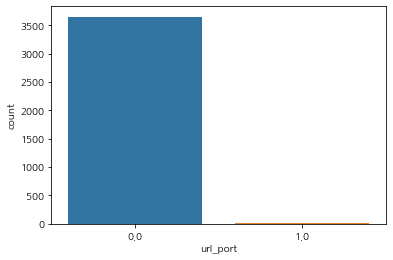

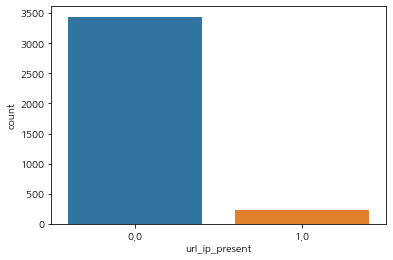

In [22]:
for i in categorical:
    sns.countplot(df[i])
    plt.show()

In [27]:
logits = dict()
for i in numerical:
    model = sm.Logit(df['Result_v1'], df[i])
    result = model.fit()
    logits[i] = result.pvalues[0]

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.631764
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.686528
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.681897
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681520
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692513
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.682097
         Iterations 6
         Current function value: 0.649991
         Iterations: 35
         Current function value: 0.656616
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
Optimization terminated successfully.
         Curre

C:\Users\User\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
sdict = sorted(logits.items(), key = lambda x:x[1])
for i in sdict:
    print(i)

('url_num_hyphens_dom', 1.2084737211225872e-61)
("html_num_tags('a')", 3.4115471422164115e-39)
("html_num_tags('script')", 1.3593095131820564e-24)
('url_hostname_len', 1.0281856912896451e-19)
('url_domain_len', 3.815200236627489e-19)
('url_num_underscores', 4.3945274438043737e-13)
("html_num_tags('div')", 4.049643290692816e-12)
("html_num_tags('form')", 2.788459941235876e-09)
("html_num_tags('object')", 4.4899993657178285e-09)
('url_path_len', 4.907665704768498e-09)
("html_num_tags('embed')", 3.3351719798740243e-07)
('url_num_dots', 0.03165642257909149)
("html_num_tags('iframe')", 0.14613605783587189)
("html_num_tags('body')", 0.5152961915296254)
("html_num_tags('head')", 0.5443683868020825)
('url_entropy', 0.9155847611354135)
('url_len', 0.9326365799988007)
('url_num_query_para', 0.9977724929227856)
('url_query_len', 0.9995771617358498)


In [34]:
for i in categorical:
    table = pd.crosstab(df['Result_v1'], df[i])
    print('교차표\n', table)
    print('-' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('기대빈도\n',result[3])
    print('자유도\n',result[2])
    print('\n\n\n')

교차표
 url_port    0.0  1.0
Result_v1           
benign     1853    5
malicious  1803    3
----------------------------------------------------------------------------------------------------
카이제곱통계량 0.0984618258872073
p-value 0.7536833698526882
기대빈도
 [[1853.94323144    4.05676856]
 [1802.05676856    3.94323144]]
자유도
 1




교차표
 url_ip_present   0.0  1.0
Result_v1                
benign          1710  148
malicious       1731   75
----------------------------------------------------------------------------------------------------
카이제곱통계량 22.629448734296957
p-value 1.9645029354744843e-06
기대빈도
 [[1744.91757642  113.08242358]
 [1696.08242358  109.91757642]]
자유도
 1






# Data Processing

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [51]:
# 중복 데이터 제거
df_dup = df.drop_duplicates(keep = 'first')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

---

In [54]:
df.columns

Index(['Unnamed: 0', 'url_len', 'url_num_hyphens_dom', 'url_path_len',
       'url_domain_len', 'url_hostname_len', 'url_num_dots',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_ip_present', 'url_entropy', 'url_chinese_present', 'url_port',
       'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'Result_v1'],
      dtype='object')

In [55]:
df['Result_v1'].unique()


array(['malicious', 'benign'], dtype=object)

In [56]:
# replace() 함수를 사용하여 텍스트 데이터를 수치형 데이터로 변경
df = df.replace({'benign':1, 'malicious' : 0})
df.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1


In [57]:
df['Result_v1'].unique()

array([0, 1], dtype=int64)

---

In [58]:
df.isna().sum()

Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [59]:
df.dropna(axis = 0, inplace = True)

In [60]:
df.isna().sum()

Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [61]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [63]:
# 전체 데이터셋
df.to_csv('df1.csv') 

In [64]:
df

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,0
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,1
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,0
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,1


In [65]:
# 0값 지우기
df2 = df.drop(['url_chinese_present', "html_num_tags('applet')"], axis = 1)
df2.to_csv('df2.csv')

In [66]:
# 0값 지우기 + 다중 공산성
df3 = df.drop(["url_hostname_len", "url_chinese_present", "html_num_tags('applet')"], axis = 1)
df3.to_csv('df3.csv')

In [67]:
# 중복 데이터 제거 + 0값 지우기
df_dup2 = df_dup.drop(['url_chinese_present', "html_num_tags('applet')"], axis = 1)
df_dup2.to_csv('df_dup2.csv')

In [68]:
df_dup3 = df_dup.drop(['url_chinese_present', "html_num_tags('applet')"], axis = 1)
df_dup3.to_csv('df_dup3.csv')